# PISA Data Evaluation
## by Andres Crucetta

## Preliminary Wrangling

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
chunksize = 10 ** 5
for chunk in pd.read_csv(r'C:\Users\acrucettan003\Documents\Udacity/Data Viz Project/pisa2012.csv', chunksize=chunksize, encoding = 'latin1'):
    df = chunk

C:\Users\acrucettan003\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31,37,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\acrucettan003\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,31,37,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,3

### What is the structure of your dataset?
> We have a very large dataset with over 450K rows and 636 colums. 

### What is/are the main feature(s) of interest in your dataset?
> I want to take a look at features related with mother's education, availability of textbooks, and math assessments / interest

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Mother's Education:
* ST14Q01	Mother Qualifications - <ISCED level 6>
* ST14Q02	Mother Qualifications - <ISCED level 5A>
* ST14Q03	Mother Qualifications - <ISCED level 5B>
* ST14Q04	Mother Qualifications - <ISCED level 4>
* ST15Q01	Mother Current Job Status

Language at Home:
* ST25Q01	International Language at Home

Math Interest:
* ST46Q01	Math Work Ethic - Homework Completed in Time
* ST46Q02	Math Work Ethic - Work Hard on Homework
* ST46Q03	Math Work Ethic - Prepared for Exams
* ST46Q04	Math Work Ethic - Study Hard for Quizzes
* ST46Q05	Math Work Ethic - Study Until I Understand Everything
* ST46Q06	Math Work Ethic - Pay Attention in Classes
* ST46Q07	Math Work Ethic - Listen in Classes
* ST46Q08	Math Work Ethic - Avoid Distractions When Studying
* ST46Q09	Math Work Ethic - Keep Work Organized
* ST49Q05	Math Behaviour - Study More Than 2 Extra Hours a Day

Reference Matherial:
* ST26Q10	Possessions - textbooks
* ST26Q11	Possessions - <technical reference books>

Math Anxiety
* ST42Q01	Math Anxiety - Worry That It Will Be Difficult
* ST42Q03	Math Anxiety - Get Very Tense
* ST42Q05	Math Anxiety - Get Very Nervous
* ST42Q08	Math Anxiety - Feel Helpless
* ST42Q10	Math Anxiety - Worry About Getting Poor <Grades>

In [4]:
# Filtering dataframe for values within the U.S.

df['CNT'].value_counts()
df_US = df[df['CNT'].str.contains('USA')]
df_US.CNT.value_counts()

Florida (USA)          1896
Massachusetts (USA)    1723
Connecticut (USA)      1697
Name: CNT, dtype: int64

In [5]:
# Filtering dataframe for the values we're interested in
# We want to filter for ST42, ST46, ST26, and ST14

column_filters = ['CNT','ST17','ST25','ST42','ST46','ST26','ST14','ST49','MATH']

df_US.loc[:, df_US.columns.str.contains('|'.join(column_filters))]

,CNT,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST17Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,...,ST49Q06,ST49Q07,ST49Q09,MATHEFF,USEMATH,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
407155,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Often,Always or almost always,Never or rarely,0.15,NaN,485.2080,443.9243,489.1027,442.3664,422.8930
407156,Florida (USA),NaN,NaN,Yes,NaN,<ISCED level 3A>,Other language,No,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.33,NaN,419.3878,430.2929,403.0301,407.7037,448.9874
407157,Florida (USA),Yes,Yes,NaN,NaN,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,1.47,NaN,517.8455,552.8976,534.9821,567.6975,557.5713
407158,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.63,NaN,457.3999,455.8420,472.9787,467.5261,494.0100
407159,Florida (USA),No,No,No,Yes,NaN,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,644.3449,585.9246,560.2197,645.9028,650.5764
407160,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,No,Yes,Yes,...,Never or rarely,Never or rarely,Never or rarely,-0.48,NaN,444.1580,405.2111,432.4739,476.0944,514.2623
407161,Florida (USA),No,Yes,Yes,No,<ISCED level 3A>,Language of the test,Yes,No,Yes,...,NaN,NaN,NaN,NaN,NaN,532.2558,582.8867,570.4237,587.5604,567.3080
407162,Florida (USA),Yes,Yes,No,No,<ISCED level 3A>,Other language,Yes,Yes,Yes,...,Always or almost always,Never or rarely,Always or almost always,2.27,NaN,498.7615,469.1619,477.7302,485.5196,477.7302
407163,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,436.1349,471.1871,503.1235,434.5770,466.5135
407164,Florida (USA),No,No,No,No,<ISCED level 3A>,Language of the test,Yes,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,623.4694,607.8906,549.4703,601.6591,558.8176


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [6]:
df_US.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,5316.000000,5.316000e+03,5316.000000,5316.000000,5316.000000,5316.0,5316.000000,5316.000000,5015.000000,5276.000000,...,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000,5316.000000
mean,409813.500000,8.400197e+06,26.027652,888.701091,10.104402,1.0,6.560384,1996.490406,5.827717,1.151820,...,50.041666,49.749568,49.529892,51.416323,52.055070,50.225948,50.888282,40.133747,1.505267,0.564333
std,1534.741346,8.245264e+01,14.865537,515.457507,0.549190,0.0,3.484885,0.499955,0.939021,0.453191,...,45.009284,46.093875,44.047270,55.649314,56.201901,46.423831,55.985941,23.340080,0.513020,0.164112
min,407156.000000,8.400100e+06,1.000000,1.000000,8.000000,1.0,1.000000,1996.000000,4.000000,1.000000,...,6.228800,6.228800,1.964100,6.228800,1.964100,6.228800,1.964100,1.000000,1.000000,0.080800
25%,408484.750000,8.400100e+06,13.000000,443.750000,10.000000,1.0,4.000000,1996.000000,5.000000,1.000000,...,15.845000,16.149900,17.043800,15.904000,16.987500,16.125000,15.976200,20.000000,1.000000,0.498600
50%,409813.500000,8.400200e+06,26.000000,886.500000,10.000000,1.0,7.000000,1996.000000,6.000000,1.000000,...,37.168850,34.908300,37.916500,36.503100,36.475000,35.813900,35.800800,40.000000,1.000000,0.557600
75%,411142.250000,8.400300e+06,39.000000,1329.250000,10.000000,1.0,10.000000,1997.000000,6.000000,1.000000,...,54.747800,52.829700,53.061700,54.747800,53.094925,53.194600,54.035300,61.000000,2.000000,0.634400
max,412471.000000,8.400300e+06,54.000000,1896.000000,12.000000,1.0,12.000000,1997.000000,16.000000,4.000000,...,227.951200,205.827900,205.827900,533.577400,533.577400,208.344800,533.577400,80.000000,3.000000,1.985300


### 1.1 - How many students took the test in their own language?

Language of the test    4533
Other language           668
Name: ST25Q01, dtype: int64


<Figure size 216x216 with 0 Axes>

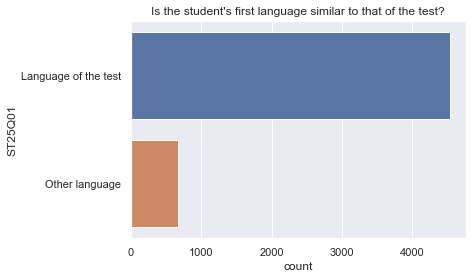

<Figure size 216x216 with 0 Axes>

In [7]:

sb.set(style="darkgrid")

print(df_US.ST25Q01.value_counts())
sb.countplot(y = df_US.ST25Q01)
plt.title("Is the student's first language similar to that of the test?")
plt.figure(figsize = (3,3))

### 1.2 - How many students had books for reference?

Text(0.5, 1.0, 'Does the student have books for reference?')

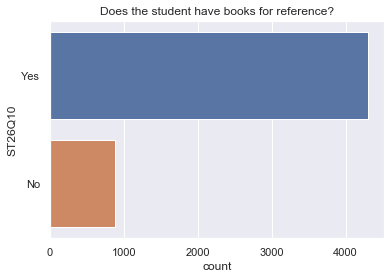

In [8]:
df_US.ST26Q10.value_counts()
sb.countplot(y = df_US.ST26Q10)
plt.title("Does the student have books for reference?")

### 1.3 - How many of the students avoid distraction when studying?

Text(0.5, 1.0, 'Does the student avoid distractions when studying?')

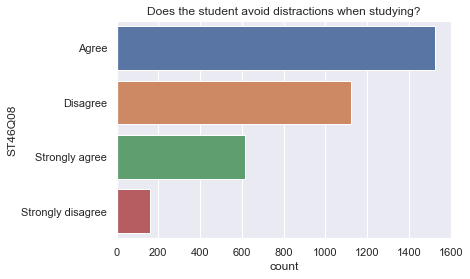

In [9]:
df_US.ST46Q08.value_counts()
sb.countplot(y = df_US.ST46Q08)
plt.title("Does the student avoid distractions when studying?")

### 1.4 - How many students study more than 2 extra hours a day

Text(0.5, 1.0, 'How often does the study more than 2 extra hours a day?')

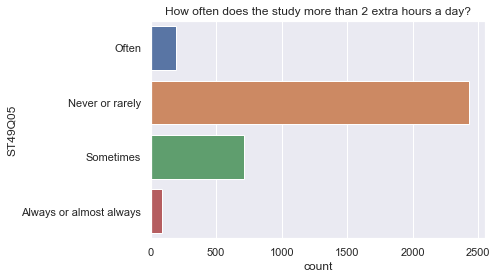

In [58]:
df_US.ST49Q05.value_counts()
sb.countplot(y = df_US.ST49Q05)
plt.title("How often does the study more than 2 extra hours a day?")

### 1.5 - How is the level of Math Literacy (PV5) across all students
![title](Documents/Udacity/img/CAPTURE.png)

C:\Users\acrucettan003\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Range of Mathematical Literacy')

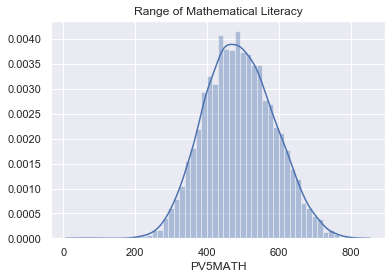

In [11]:
# Categorizing the levels of literacy based on the table description
df_US["PV5_literacy"] = pd.cut(x=df_US['PV5MATH'], bins=[0, 357.8, 420.1,482.4,544.7,607,699.3,max(df_US.PV5MATH)], 
                               labels=['Below level 1', 'Level 1', 'Level 2','Level 3','Level 4','Level 5','Level 6'])

# Plotting the raw distribution of values
sb.distplot(df_US.PV5MATH)
plt.title("Range of Mathematical Literacy")

### 1.6 - How many hours do the students spend in Homework or Guided Homework?

count    46270.000000
mean         6.631403
std          6.454623
min          0.000000
25%          2.000000
50%          4.000000
75%         10.000000
max         30.000000
Name: ST57Q01, dtype: float64


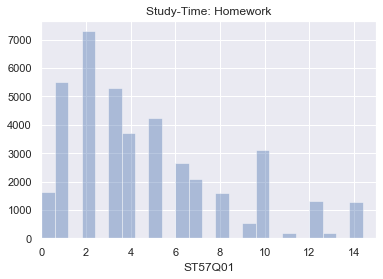

In [12]:
# Eliminating Null values within Study-Time: Personal Tutor

df_US_no_nulls = df.dropna(subset=['ST57Q01','ST57Q02'])

# Plotting distribution of study-time for homework
sb.distplot(df_US_no_nulls.ST57Q01, kde = False)

plt.title("Study-Time: Homework")
plt.xlim(0,15)

print(df_US_no_nulls.ST57Q01.describe())

count    46270.000000
mean         1.772207
std          2.571139
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         30.000000
Name: ST57Q02, dtype: float64


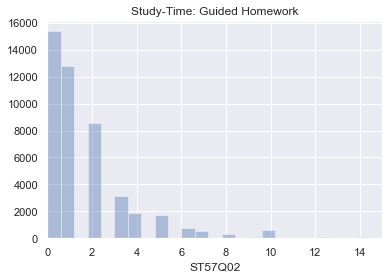

In [13]:
sb.distplot(df_US_no_nulls.ST57Q02, kde = False)

# Plotting distribution of study-time for guided homework
plt.title("Study-Time: Guided Homework")
plt.xlim(0,15)

print(df_US_no_nulls.ST57Q02.describe())

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* There's a considerable amount of students who took the test in a language different than their native one (approx. 10-15%)
* Most students (75%) have books for reference for their studies, it is still worth considering why there are around 20-25% of students with no access to books. 
* Thankfully, most students (50%+) avoid distraction when studying, since this is a survey I would imagine this particular question to not be too reliable
* Most students (60%+) don't study more than 2 extra hours per day 
* The level of mathematical literacy for PV5 ranged around 492~ (Level 3) with a standard deviation of 96. It seems that most student have a level 3 literacy
* The average student spends approximately 6 hours working on their school homework
* The average student spends approximately 2.5 hours working on guided school homework

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions, I did had to bucket the different levels of mathematical literacy to match the segmentation in the PISA survey. I did this so we could obtain a clear figure of the mathematical performance of students based on different factors such as studiousness and avoidance of distraction 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 2.1 - Out of the students for whom the test wasn't in their first language, how many owned textbooks?

Approximately 74.3 % of students own textbooks


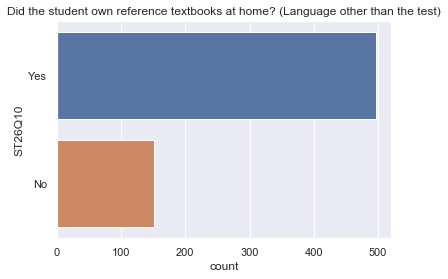

In [61]:
df_US_lg_1 = df_US[df_US.ST25Q01 == "Other language"] 

sb.countplot(y = df_US_lg_1.ST26Q10)
plt.title("Did the student own reference textbooks at home? (Language other than the test)")

percentage_with_books_1 = (len(df_US_lg_1[df_US_lg_1.ST26Q10 == 'Yes'])/len(df_US_lg_1.ST26Q10))*100
percentage_with_books_1 = round(percentage_with_books_1, 1)

print("Approximately {} % of students own textbooks".format(percentage_with_books_1))

### 2.2 -  Out of the students for whom the test was their first language, how many owned textbooks?

Approximately 82.7 % of students own textbooks


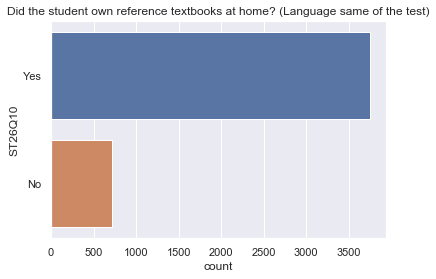

In [62]:
df_US_lg_2 = df_US[df_US.ST25Q01 == "Language of the test"] 

sb.countplot(y = df_US_lg_2.ST26Q10)
plt.title("Did the student own reference textbooks at home? (Language same of the test)")

percentage_with_books_2 = (len(df_US_lg_2[df_US_lg_2.ST26Q10 == 'Yes'])/len(df_US_lg_2.ST26Q10))*100
percentage_with_books_2 = round(percentage_with_books_2, 1)

print("Approximately {} % of students own textbooks".format(percentage_with_books_2))

# Interesting, it seems that there are 8% less students owning books for those for whom test is not in their first language

### 2.3 -  Of the students that avoided distraction, how is their performance in the mathematical literacy test?

Text(0.5, 0, 'Levels of Literacy')

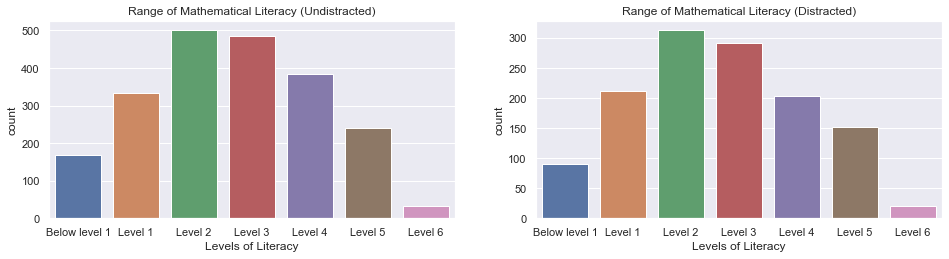

In [16]:
df_US.ST46Q08.value_counts()

# Filtering values for distracted and undistracted students
df_US_undistracted = df_US[df_US.ST46Q08.isin(['Agree','Strongly agree'])]
df_US_distracted = df_US[df_US.ST46Q08.isin(['Disagree','Strongly disagree'])]

# Level of Mathemtical Literacy
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sb.countplot(df_US_undistracted.PV5_literacy)
plt.title("Range of Mathematical Literacy (Undistracted)")
plt.xlabel("Levels of Literacy")

plt.subplot(2,2,2)
sb.countplot(df_US_distracted.PV5_literacy)
plt.title("Range of Mathematical Literacy (Distracted)")
plt.xlabel("Levels of Literacy")

# Interesting, it seems like distraction doesn't really contribute as much to the mathematical literacy

### 2.4 -  Of the students that study more than 2 hours, how is their performance in the mathematical literacy test?

Text(0.5, 0, 'Levels of Literacy')

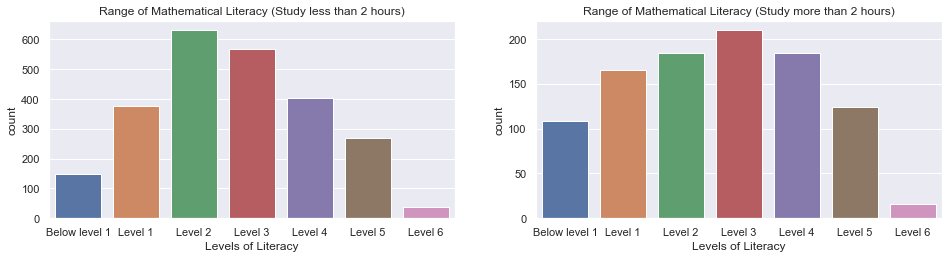

In [17]:
df_US.ST49Q05.value_counts()

# Filtering values for students who study more and less than 2 hours
df_US_more2 = df_US[df_US.ST49Q05.isin(['Often','Always or almost always','Sometimes'])]
df_US_less2 = df_US[df_US.ST49Q05.isin(['Never or rarely'])]

# Level of Mathemtical Literacy
plt.figure(figsize=(16, 8))
plt.subplot(2,2,1)
sb.countplot(df_US_less2.PV5_literacy)
plt.title("Range of Mathematical Literacy (Study less than 2 hours)")
plt.xlabel("Levels of Literacy")

plt.subplot(2,2,2)
sb.countplot(df_US_more2.PV5_literacy)
plt.title("Range of Mathematical Literacy (Study more than 2 hours)")
plt.xlabel("Levels of Literacy")

### 2.4 -  How does the mathematical proficiency change based on the mother's job status?

C:\Users\acrucettan003\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\acrucettan003\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


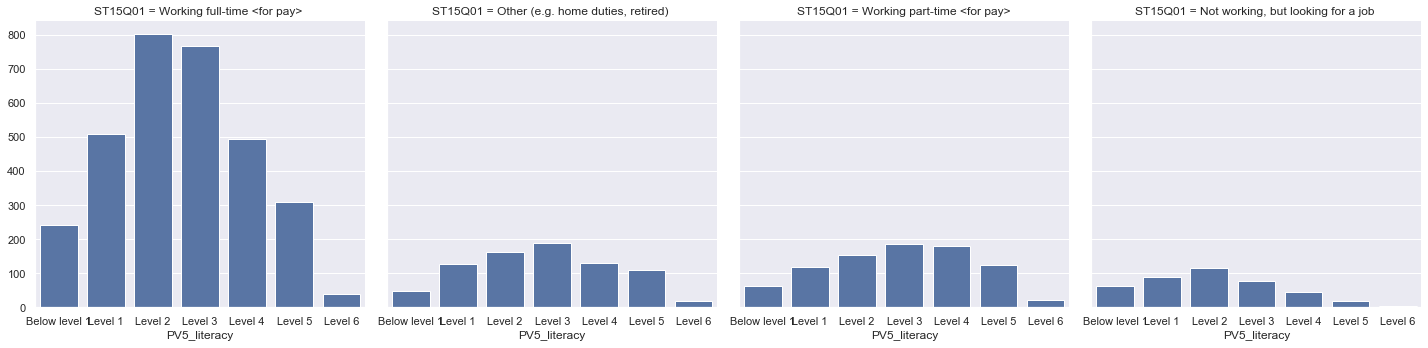

In [18]:
df_US.ST15Q01.value_counts()

g = sb.FacetGrid(data = df_US, col = 'ST15Q01', col_wrap = 4, size = 5)
g.map(sb.countplot,"PV5_literacy")

#### How does the mathematical proficiency of the students change based on the father's job status?

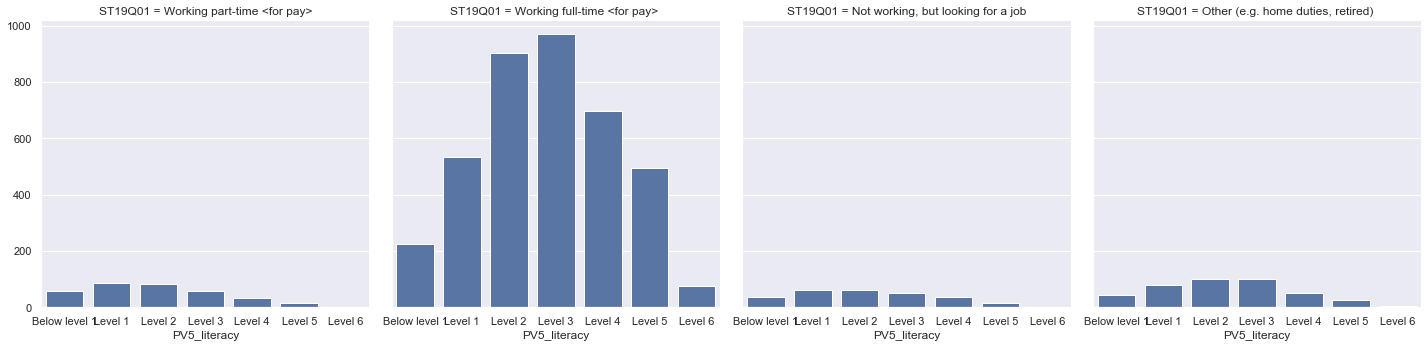

In [19]:
df_US.ST19Q01.value_counts()

g = sb.FacetGrid(data = df_US, col = 'ST19Q01', col_wrap = 4, size = 5)
g.map(sb.countplot,"PV5_literacy")

### 2.5 -  Does helping other friends with school work increases mathematical proficiency?

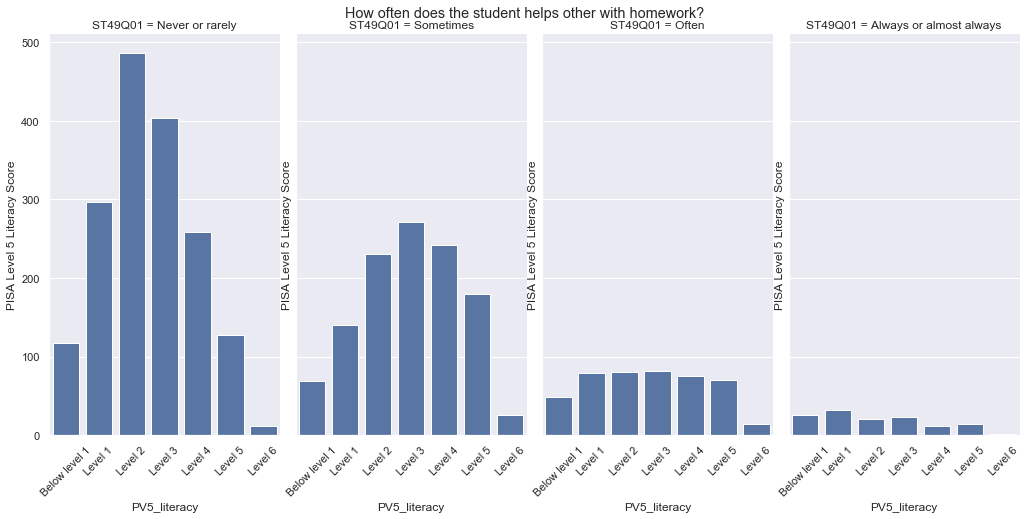

In [20]:
df_US.ST49Q01.value_counts()

g = sb.FacetGrid(data = df_US, col = 'ST49Q01', col_wrap = 4, size = 5)
g.map(sb.countplot,"PV5_literacy")
g.fig.suptitle('How often does the student helps other with homework?')
g.set(ylabel = 'PISA Level 5 Literacy Score')
g.fig.set_size_inches(14,7)
g.set_xticklabels(rotation = 45)

It seems that for students that "Sometimes" or "Often" help others have more students in level 3 and 4 that those who rarely help other students.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are very interesting relationships between the students studying dilligently, posessing reference materials, and helping each other with mathematical proficiency

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The most interesting relationships were around the impact of the father working part-time versus the mother working part-time. It seems that for most households when the father is working part-time it may be a signal of the lack of resources within the household. This may correlate with less money for textbooks and reference material. It may also correlate with less tutoring to improve on the student's weak areas. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 3.1 - How does the mathematical literacy vary depending on the student's willingness to help others and the his native language?

Text(0, 0.5, 'Score in the Level 5 Literacy Test')

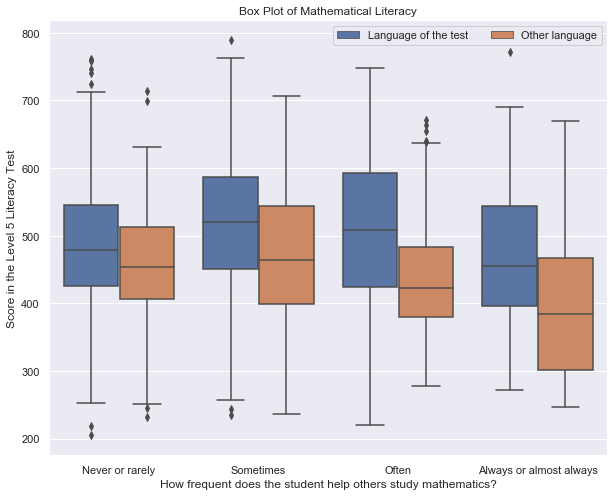

In [21]:
plt.figure(figsize = (10,8))
ax = sb.boxplot(data = df_US, x = 'ST49Q01', y = 'PV5MATH',hue = 'ST25Q01')
ax.legend(loc = 1, ncol = 3, framealpha = 1)
plt.title('Box Plot of Mathematical Literacy')
plt.xlabel('How frequent does the student help others study mathematics?')
plt.ylabel('Score in the Level 5 Literacy Test')


It seems that those students who help others have higher levels of literacy, however, there's a rare outlier for those who "always" help other students. They don't seem to have higher levels of literacy.  Also students for whom the test is not in their language have lower scores than those for whom it is.

### 3.2 - How does the mathematical literacy vary depending on the student's willingness to help others and the his native language?

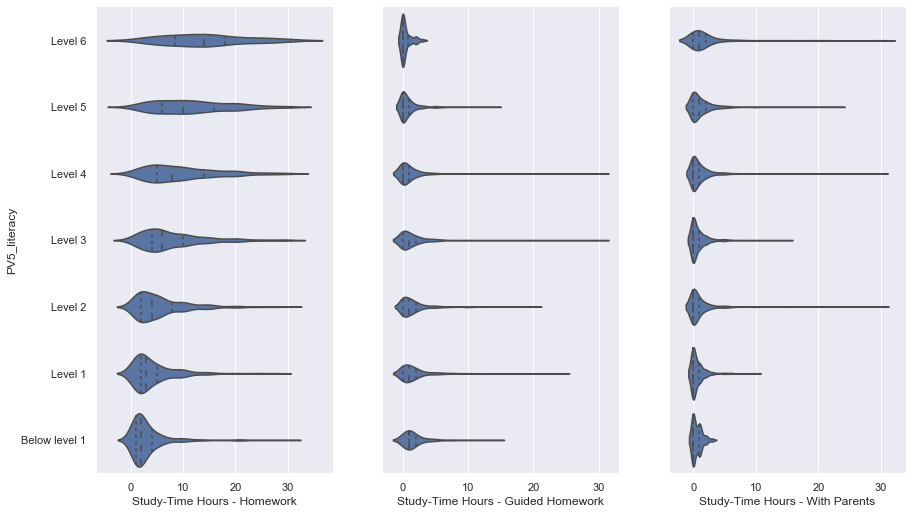

In [40]:
g = sb.PairGrid(data = df_US, y_vars = ['PV5_literacy'], x_vars = ['ST57Q01','ST57Q02','ST57Q05'])
g.map(sb.violinplot, inner = 'quartile')
g.fig.set_size_inches(13,10)

# Replacing question numbers with an understandable axis label
replacements = {'ST57Q01': "Study-Time Hours - Homework", 'ST57Q02': "Study-Time Hours - Guided Homework",
                'ST57Q05': "Study-Time Hours - With Parents"}

for i in range(1):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])

#### 3.2.1 - Let's explore the first violin plot

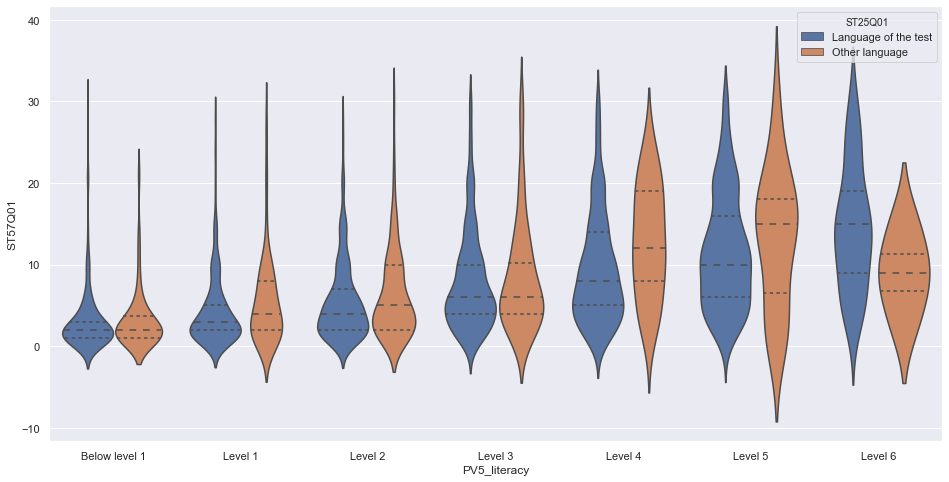

In [65]:
plt.figure(figsize = (16,8)) 
sb.violinplot(data = df_US, x = 'PV5_literacy', y = 'ST57Q01', hue = 'ST25Q01', inner = 'quartile', split=False)

It seems there's a correlation between time spent in the homework and the level of math literacy across all students

It also looks like students foreign students spend more time on homework to get a similar level of Math proficiency on average than native students.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* For 3.1, it was interesting how helping other students proved to positively correlate with higher literacy up to a point

* For 3.2, we could see a positive correlation between more hours of homework and higher levels of literacy. However, this didn't stand truth when looking at time spent in guided homework or studying with parents

* For 3.2.1, it looks like foreign students spent more hours studying for test than native students.

### Were there any interesting or surprising interactions between features?

* I would have expected more time in Guided Homework or time spent studying with parents to correlate with higher levels of literacy. 
* I would also have expected students who "Always" help others to have higher levels of literacy. This didn't prove the case.
* It was interesting how foreign students spent more time studying for the test than native students.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!